In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio

Data = scio.loadmat('data_sets/ex7data1.mat')
print(Data)
X = Data['X']
print(X.shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011', '__version__': '1.0', '__globals__': [], 'X': array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],


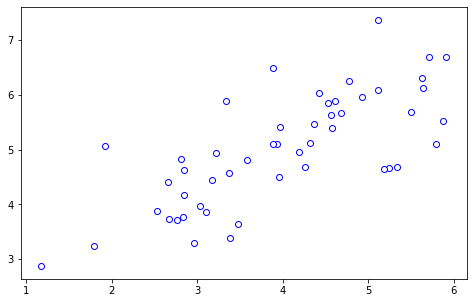

In [10]:
plt.figure(figsize = (8, 5))
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = 'white', linewidths = 1, edgecolor = 'blue')
plt.show()

In [20]:
'''
Implementing PCA
PCA consists of two computational steps:
First, you compute the covariance matrix of the data.
Then, you use SVD function to compute the eigenvectors.
'''


def feature_normalize(X):
    means = X.mean(axis = 0)
    stds = X.std(axis = 0, ddof = 1) # 无偏的标准差，自由度为n-1
    X_norm = (X - means) / stds
    return means, stds, X_norm

def pca(X):
    '''
    First, compute the covariance matrix of the data.
    Then, use SVD function to compute the principal components
    U: the principal components
    S: a diagonal matrix
    '''
    cov_mat = X.T @ X / X.shape[0]
    U, S, V = np.linalg.svd(cov_mat)
    return U, S, V


In [25]:
means, stds, X_norm = feature_normalize(X)
U, S, V = pca(X_norm)
print('U:\n', U)
print('\nS:\n', S)

U:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

S:
 [1.70081977 0.25918023]


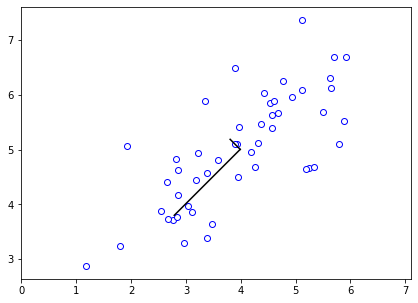

In [30]:
plt.figure(figsize = (7, 5))
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = 'white', linewidths = 1, edgecolor = 'blue')
plt.plot([means[0], means[0] + U[0, 0] * S[0]],
         [means[1], means[1] + U[1, 0] * S[0]], c = 'black')
plt.plot([means[0], means[0] + U[0, 1] * S[1]],
         [means[1], means[1] + U[1, 1] * S[1]], c = 'black')

plt.axis('equal') # make the new axis keep vertical
plt.show()

In [33]:
'''
Dimensionality Reduction with PCA
'''
def project_data(X, U, K):
    U_reduce = U[:, :K]
    Z = X @ U_reduce
    return Z

Z = project_data(X_norm, U, K = 1)
print(Z[0])

[1.48127391]


In [34]:
def recover_data(Z, U, K):
    U_reduce = U[:, :K]
    X_rec = Z @ U_reduce.T
    return X_rec

X_rec = recover_data(Z, U, K = 1)
print(X_rec[0])

[-1.04741883 -1.04741883]


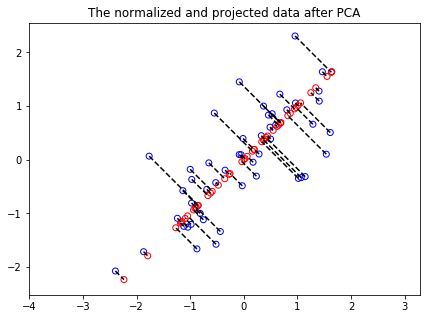

In [35]:
'''
Visualizing the projections
'''
plt.figure(figsize = (7, 5))
plt.axis('equal')
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker = 'o', facecolors = 'none', edgecolors = 'b')
plt.scatter(X_rec[:, 0], X_rec[:, 1], marker = 'o', facecolors = 'none', edgecolors = 'r')
for i in range(len(X_norm)):
    plt.plot([X_norm[i, 0], X_rec[i, 0]],
             [X_norm[i, 1], X_rec[i, 1]], 'k--')
plt.title('The normalized and projected data after PCA')
plt.show()

In [39]:
def retained_variance(S, K):
    rv = np.sum(S[:K]) / np.sum(S)
    return rv

print('{:.2f}%'.format(retained_variance(S, K = 1) * 100))


86.78%


In [41]:
'''
Face Image Dataset
'''
Data_face = scio.loadmat('data_sets/ex7faces.mat')
X_face = Data_face['X']
print(X_face.shape)

(5000, 1024)


<Figure size 432x288 with 0 Axes>

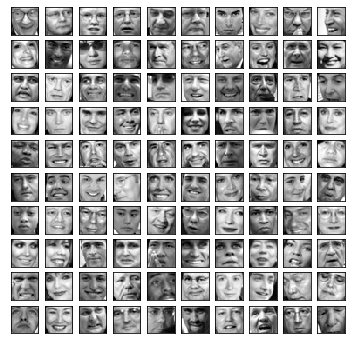

In [50]:
def display_data(X):
    plt.figure()
    n = np.round(np.sqrt(X.shape[0])).astype(int)
    # define a n times n subplot
    fig, a = plt.subplots(nrows = n, ncols = n, sharex = True, sharey = True, figsize = (6, 6))
    # plot one face image in each subplot
    for row in range(n):
        for col in range(n):
            a[row, col].imshow(X[n * row + col].reshape(32, 32).T, cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

display_data(X_face[:100, :]) 

(1024, 1024)
(1024,)
(1024, 1024)


<Figure size 432x288 with 0 Axes>

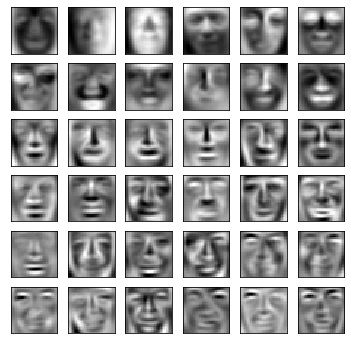

In [56]:
'''
PCA on Faces
'''
means_face, stds_face, X_face_norm = feature_normalize(X_face)
U_f, S_f, V_f = pca(X_face_norm)
print(U_f.shape)
print(S_f.shape)
print(V_f.shape)
display_data(U_f[:, :36].T)

<Figure size 432x288 with 0 Axes>

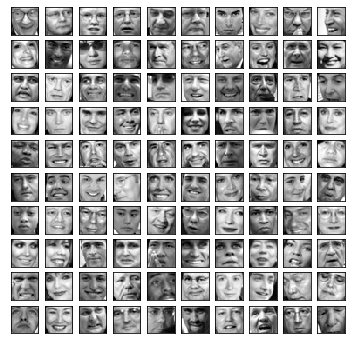

<Figure size 432x288 with 0 Axes>

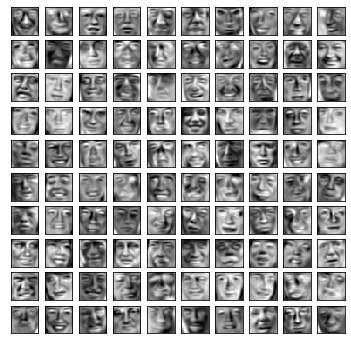

In [57]:
'''
Dimensionality Reduction
'''
Z_f = project_data(X_face_norm, U_f, K = 100)
X_face_rec = recover_data(Z_f, U_f, K = 100)

display_data(X_face[:100, :]) 
display_data(X_face_rec[:100, :]) 

In [58]:
print('{:.2f}%'.format(retained_variance(S_f, K = 100) * 100))

93.19%


In [68]:
'''
Optional exercise: PCA for visualization
'''
from skimage import io
import mpl_toolkits.mplot3d as Axes3D

A = io.imread('data_sets/bird_small.png')
print(A[0][0])
A = A / 255
print(A[0][0])

[219 180 103]
[0.85882353 0.70588235 0.40392157]


In [82]:
def find_closest_centroids(x, centroid):
    '''
    This function takes the data matrix X and the locations of  
    all centroids inside centroids and should output a one-dimensional  
    array idx that holds the index (a  value  in{1,...,K},  
    where K is total number of centroids) of the closest centroid to 
    every training example.
    '''
    m = x.shape[0]
    k = centroid.shape[0]
    idx = np.zeros(m, dtype = 'int')
    distance = np.full(k, np.inf)
    for i in range(m):
        distance = np.sum(np.power(x[i] - centroid, 2), axis = 1)
        idx[i] = np.argmin(distance) + 1
    return idx

def compute_centroids(x, idx, K):
    mu = np.zeros((K, x.shape[1]))
    for i in range(1, K + 1):
        mu[i - 1] = x[idx == i].mean(axis = 0)
    return mu

def run_kmeans(x, K, centroids, iterations):
    for iter in range(iterations):
        idx = find_closest_centroids(x, centroids)
        centroids = compute_centroids(x, idx, K)
    return centroids, idx

def kmeans_init_centroids(x, K):
    randidx = np.random.choice(x.shape[0], K) # randomly choose the training index
    centroids = x[randidx]
    return centroids

In [83]:
x_pixel = A.reshape(-1, 3)
K = 16
max_iters = 10
initial_centroids = kmeans_init_centroids(x_pixel, K = 16)
centroids, idx = run_kmeans(x_pixel, K, initial_centroids, max_iters)

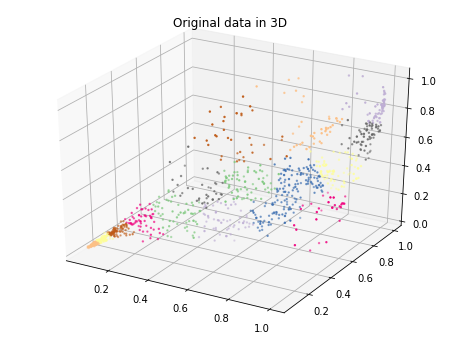

In [99]:
sel = np.random.randint(x_pixel.shape[0], size = 1000) # randomly choose 1000 indices of x_pixel
cm = plt.cm.get_cmap('Accent') # setup colors

# plot the original data in 3D
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.scatter(x_pixel[sel, 0], x_pixel[sel, 1], x_pixel[sel, 2], c = (idx[sel] - 1), cmap = cm, s = 2)
plt.title('Original data in 3D')
plt.show()

In [93]:
# tackle data with pca
means_pixel, stds_pixel, x_pixel_norm = feature_normalize(x_pixel)
U_pixel, S_pixel, V_pixel = pca(x_pixel_norm)
Z_pixel = project_data(x_pixel_norm, U_pixel, K = 2)

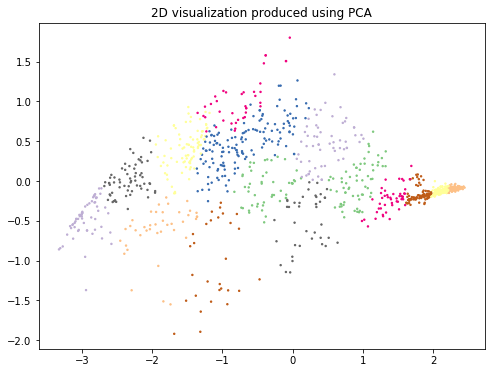

In [96]:
# plot the compressed data in 2D 
plt.figure(figsize = (8, 6))
plt.scatter(Z_pixel[sel, 0], Z_pixel[sel, 1], c = (idx[sel] - 1), cmap = cm, s = 2)
plt.title('2D visualization produced using PCA')
plt.show()

In [97]:
print('{:.2f}%'.format(retained_variance(S_pixel, K = 2) * 100))

99.34%
